In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("insideairbnb/porto_06-2019_listings.csv")

df['date']=pd.to_datetime(df['first_review'],format='%Y-%m-%d')
df['lol'] = 1



In [3]:
df.index = df['date'] 

cumulative = df.resample('M').lol.sum().cumsum()

Este gráfico mostra a evolução do número de listings de forma comulativa.

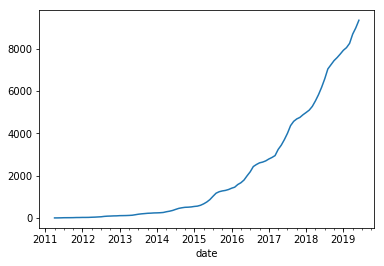

In [4]:
cumulative.plot()

In [5]:
df = pd.read_csv("insideairbnb/porto_06-2019_listings.csv")

numberOfListings = df.groupby('host_id').host_id.count()

numberDF= pd.DataFrame({'id':numberOfListings.index, 'num':numberOfListings.values})

numberDF = numberDF.groupby('num').num.count()

numberDF= pd.DataFrame({'nAnuncios':numberDF.index, 'nAnunciantes':numberDF.values})

In [6]:
numberDF[numberDF.nAnuncios > 1].sum()

nAnuncios       1032
nAnunciantes    1693
dtype: int64

In [7]:
print(numberDF)

    nAnuncios  nAnunciantes
0           1          3536
1           2           695
2           3           327
3           4           221
4           5           120
5           6            99
6           7            64
7           8            35
8           9            31
9          10            15
10         11            12
11         12            12
12         13            10
13         14             8
14         15             5
15         16             3
16         17             3
17         18             1
18         19             3
19         20             1
20         21             3
21         22             1
22         24             3
23         25             2
24         27             1
25         29             1
26         30             1
27         32             3
28         33             1
29         35             2
30         37             1
31         39             1
32         41             1
33         46             1
34         49       

3538 anunciantes têm apenas 1 anúncio. 1694 anunciantes têm 2 ou mais anúncios. Ou seja __32%__  dos anunciantes têm 2 ou mais anúncios, que correspondem a __70%__  dos total de anuncios. 

c:\users\joão bernardo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


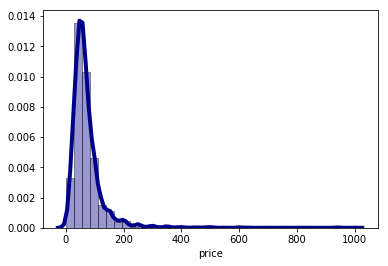

In [8]:
dfTotal = pd.read_csv("insideairbnb/porto_06-2019_listings.csv")
dfTotal.price = dfTotal.price.str[1:].convert_objects(convert_numeric=True)
dfTotal.price.dropna()
dfTotal.price = np.nan_to_num(dfTotal.price)


sns.distplot(dfTotal['price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

O preço médio é de __68$__ .

In [9]:
df['room_type'].value_counts()

Entire home/apt    8642
Private room       2178
Shared room         146
Name: room_type, dtype: int64

In [10]:
df['accommodates'].value_counts()

4     3299
2     3185
6     1324
3     1200
5      673
8      427
1      301
7      191
10     141
9       70
12      64
16      29
14      25
11      16
13       9
15       9
18       2
17       1
Name: accommodates, dtype: int64